<h1 align="center" color:blue> Review Analysis </h1>

## Steps

- Length of Review
- Number of Sentences
- Average Sentence Length
- Percentage of Question Sentence
- Number of Exclamation Mark
- Number of Upper case words (Fully Upper)
- Number of words with Proper Format (Upper followed by small case)
- Number of Emojis


## NLP

- Correct Spelling from the review
- Remove Stop Words
- Apply Lemmatization
- Create Unigram of the corpus
- Create Tf-Idf Matrix of the Corpus
- POS Tagging
- % Nouns
- % Verbs
- % Adjective
- % Adverbs

In [240]:
# Importing Necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
nlp=spacy.load('en_core_web_sm')
from sklearn.model_selection import train_test_split
from spacy.pipeline import SentenceSegmenter
import re
import warnings
warnings.filterwarnings('ignore')
import textblob
from textblob import TextBlob

# Customization of View
pd.options.display.max_columns = 999

In [146]:
df=pd.read_csv("Iphone7 Reviews.csv",index_col="Sr.No")

In [147]:
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1102, 1104, 1105, 1198, 1204, 1206, 1207, 1229, 1230, 1259],
           dtype='int64', name='Sr.No', length=263)

In [148]:
df.columns

Index(['Review_Title', 'Review_Text', 'Review_Rating', 'Buyer_Type',
       'Review_Date', 'Upvote', 'Downvote', 'read', 'Sum_of_Up_Down'],
      dtype='object')

In [149]:
df.head()

,Review_Title,Review_Text,Review_Rating,Buyer_Type,Review_Date,Upvote,Downvote,read,Sum_of_Up_Down
Sr.No,,,,,,,,,
1,Classy product,Too good luv it\n iPhone is only camera lovers,5,Certified Buyer,4 months ago,704,88,NaN,792
2,Must buy!,From last 5 years my younger brother was using...,5,Certified Buyer,4 months ago,2100,314,NaN,2414
3,Excellent,I click this photo on wall painting,5,Certified Buyer,5 months ago,1062,160,NaN,1222
4,Pretty good,It was as expected ❤,4,Certified Buyer,4 months ago,1394,224,NaN,1618
5,Highly recommended,superb product...i liked it very much,5,Certified Buyer,"Dec, 2018",400,66,NaN,466


### Length Of Reviews

In [150]:
df.Review_Text

Sr.No
1          Too good luv it\n iPhone is only camera lovers
2       From last 5 years my younger brother was using...
3                     I click this photo on wall painting
4                                    It was as expected ❤
5                   superb product...i liked it very much
                              ...                        
1206    I ordered iphone from SupercomNet\n And here o...
1207    I have used for only two weeks and the phone g...
1229    Awesome phone...I preordered the phone not onl...
1230    The IPhone 7 is a great device. There are no l...
1259    I received a defective product - the iphone wa...
Name: Review_Text, Length: 263, dtype: object

In [151]:
df["Len_before"] = df.Review_Text.apply(lambda x: len(x.split()))

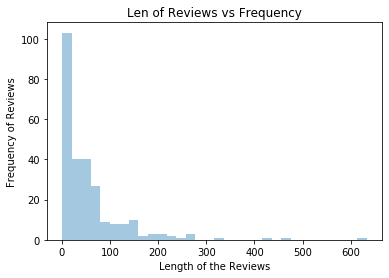

In [152]:
sns.distplot(df.Len_before,kde=False)
plt.xlabel("Length of the Reviews")
plt.ylabel("Frequency of Reviews")
plt.title("Len of Reviews vs Frequency")
plt.show()

In [153]:
df.Len_before.describe()

count    263.000000
mean      57.532319
std       76.299167
min        1.000000
25%        9.000000
50%       36.000000
75%       72.500000
max      633.000000
Name: Len_before, dtype: float64

### Number of Sentence

In [154]:
pipeline = spacy.load('en_trf_bertbaseuncased_lg')

In [155]:
def num_sentence(text):
    doc = pipeline(text)
    return len(list(doc.sents))

**Using Transformers to count the number of sentences is taking long time compared to English() in spacy.... (Experimented by Tamse) will be used going forward**

In [156]:
df['Num_Sentence']=df.Review_Text.apply(num_sentence)

### Average Sentence Length

In [157]:
df.Num_Sentence.mean()

3.9961977186311786

### Number of Question Sentence

In [158]:
df['No_QMark'] = df.Review_Text.str.count(pat='\?')
df.No_QMark

Sr.No
1       0
2       0
3       0
4       0
5       0
       ..
1206    2
1207    0
1229    0
1230    0
1259    0
Name: No_QMark, Length: 263, dtype: int64

In [159]:
df.No_QMark.value_counts()

0    260
1      2
2      1
Name: No_QMark, dtype: int64

### Number of Exclamation Mark

In [160]:
df['No_ExMark']=df.Review_Text.str.count(pat='!').value_counts()
df.No_ExMark

Sr.No
1       14.0
2        9.0
3        3.0
4        3.0
5        1.0
        ... 
1206     NaN
1207     NaN
1229     NaN
1230     NaN
1259     NaN
Name: No_ExMark, Length: 263, dtype: float64

In [161]:
df.No_ExMark.value_counts()

1.0     3
3.0     2
2.0     1
9.0     1
14.0    1
Name: No_ExMark, dtype: int64

### Number of Upper case words (Fully Upper)

In [162]:
def count_upper(text):
    count=0
    for i in text.split():
        if text.isupper():
            count+=1
    return count

In [163]:
df['No_Upper']=df.Review_Text.apply(count_upper)

In [164]:
df.No_Upper.value_counts()

0    262
4      1
Name: No_Upper, dtype: int64

## Number of words with Proper Format

In [165]:
def count_proper(text):
    count=0
    for i in text.split():
        if text.istitle():
            count+=1
    return count

In [166]:
df['No_proper']=df.Review_Text.apply(count_proper).value_counts()

## Number of Emojis

In [167]:
import emoji
def emoji_count(text):
    return emoji.emoji_count(text)

In [168]:
df['Emoji_Count']=df.Review_Text.apply(emoji_count)

In [169]:
df.Emoji_Count.head()

Sr.No
1    0
2    0
3    0
4    1
5    0
Name: Emoji_Count, dtype: int64

# NLP

In [170]:
df.columns

Index(['Review_Title', 'Review_Text', 'Review_Rating', 'Buyer_Type',
       'Review_Date', 'Upvote', 'Downvote', 'read', 'Sum_of_Up_Down',
       'Len_before', 'Num_Sentence', 'No_QMark', 'No_ExMark', 'No_Upper',
       'No_proper', 'Emoji_Count'],
      dtype='object')

In [171]:
df["h"]=np.round(df.Upvote /(df.Upvote + df.Downvote),2)

In [172]:
df.columns

Index(['Review_Title', 'Review_Text', 'Review_Rating', 'Buyer_Type',
       'Review_Date', 'Upvote', 'Downvote', 'read', 'Sum_of_Up_Down',
       'Len_before', 'Num_Sentence', 'No_QMark', 'No_ExMark', 'No_Upper',
       'No_proper', 'Emoji_Count', 'h'],
      dtype='object')

<font color="red"><h3>Saving all feature in a csv</h3></font>

In [173]:
df.to_csv("withfeatures.csv")

In [174]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [175]:
X=X.reset_index()

In [176]:
X_train_val, X_test, y_train_val, y_test=train_test_split(X,y,test_size=60,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=60,random_state=0)

In [177]:
X_train.shape,X_val.shape,X_test.shape

((143, 17), (60, 17), (60, 17))

In [178]:
y_train.shape,y_val.shape,y_test.shape

((143,), (60,), (60,))

<font color="red"><h3>Going forward we are using Train Dataset alone</h3></font>

### For Pipeline

- Handling Emoji's and Special Characters
- Spell Correct of Review_Text

### Handling Emoji's

In [179]:
def remove_emoji(text):
    return text.encode('ascii','ignore').decode('ascii').strip()

In [180]:
X_train['Review_Text']=X_train.Review_Text.apply(remove_emoji)

In [181]:
X_train.Review_Text.shape

(143,)

## Punctuations

In [182]:
def remove_punctuations(text):
    return re.sub('[^\w\s%,-.]',"",text).strip()

In [183]:
X_train.Review_Text=X_train.Review_Text.apply(remove_punctuations)

In [184]:
X_train.Review_Text.head()

80     my iphone disply not worked within 5 days and ...
6               black beauty... everything is perfect...
119    with in 3 day used this is dead suddenly not s...
112    On Time Delivery Best Part Of Flipkart.\n \n A...
222    Awesome product - usual for Apple. Not having ...
Name: Review_Text, dtype: object

### Correct Spelling from the review (Using Textblob)

In [185]:
def spell_correct(text):
    return str(TextBlob(text).correct())

In [186]:
X_train.Review_Text=X_train.Review_Text.apply(spell_correct)

In [187]:
X_train.Review_Text.head()

80     my phone display not worked within 5 days and ...
6               black beauty... everything is perfect...
119    with in 3 day used this is dead suddenly not s...
112    In Time Delivery West Part Of Flipkart.\n \n A...
222    Awesome product - usual for Apple. Not having ...
Name: Review_Text, dtype: object

## Remove Stopwords and Applying Lemmatization of the word

In [209]:
stopwords=list(nlp.Defaults.stop_words)
stopwords[:10]

['this',
 'never',
 'our',
 'twelve',
 'none',
 'through',
 'them',
 'at',
 'hereafter',
 'those']

In [189]:
X_train.Review_Text=X_train.Review_Text.apply(lambda text: " ".join(token.lemma_ for token in nlp(text) 
                                           if not token.is_stop))

In [190]:
print(X_train.Review_Text.head(10))

80     phone display work 5 day flipkaft didn support...
6                           black beauty ... perfect ...
119    3 day dead suddenly charging unable power \n \...
112    Time Delivery West Flipkart . \n \n  Amazing R...
222    awesome product - usual Apple . have round jac...
185    buy product 60000 ruble repay courier boy keep...
261    shone 7 great device . law whatsoever . feel p...
54      face issue device unable initiate return replace
249    apple device . honestly way well andro phone p...
19     Expecticular Product ... phone good .... good ...
Name: Review_Text, dtype: object


In [191]:
print(X_train.Review_Text[80])

phone display work 5 day flipkaft didn support way apple store , 10 day replacement warranty ...


In [211]:
X_train["Len_after"] = X_train.Review_Text.apply(lambda x: len(x.split()))

In [193]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [194]:
count = CountVectorizer()

In [195]:
X=count.fit_transform(X_train.Review_Text)

In [196]:
bow=pd.DataFrame(data=X.toarray(),columns=count.get_feature_names())

In [197]:
bow.head()

,10,100,1080p,12,128,15,16,1664128,1715,1960,...,world,worry,worth,wow,write,wrong,year,yes,you,young
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
tfidf= TfidfVectorizer()

In [199]:
X=tfidf.fit_transform(X_train.Review_Text)

In [200]:
tfidf=pd.DataFrame(data=X.toarray(),columns=tfidf.get_feature_names())

In [201]:
tfidf.head()

,10,100,1080p,12,128,15,16,1664128,1715,1960,...,world,worry,worth,wow,write,wrong,year,yes,you,young
0,0.276619,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.242781,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## POS Tagging

In [212]:
def pos(text):
    doc=nlp(text)
    return ' '.join([token.pos_ for token in doc])

In [213]:
X_train['POS']=X_train.Review_Text.apply(pos)

In [214]:
X_train.POS

80     NOUN NOUN NOUN NUM NOUN PROPN PROPN PROPN PROP...
6                               ADJ NOUN PUNCT ADJ PUNCT
119    NUM NOUN ADV ADV VERB ADJ NOUN SPACE ADV VERB ...
112    PROPN PROPN PROPN PROPN PUNCT SPACE ADJ ADJ PR...
222    ADJ NOUN PUNCT ADJ PROPN PUNCT AUX PROPN PROPN...
                             ...                        
41                                                 PROPN
36     ADJ NOUN NOUN ADJ NOUN NOUN NOUN VERB ADJ NOUN...
201    NOUN SPACE NUM PUNCT NOUN NOUN SPACE NUM PUNCT...
60                                     ADJ NOUN ADJ NOUN
115    ADJ SPACE NOUN ADJ PUNCT ADJ NOUN SPACE NOUN N...
Name: POS, Length: 143, dtype: object

## Percentage of Noun

In [228]:
def Noun(text):
    text_len=len(text.split())
    noun_count=0
#     print(text.split())
    for word in text.split():
        if word=='NOUN':
            noun_count+=1
    return np.round((noun_count/text_len)*100,2)

In [229]:
X_train['Perc_Noun']=X_train.POS.apply(Noun)

In [231]:
X_train['Perc_Noun'].head()

80     47.06
6      20.00
119    32.65
112    24.32
222    25.93
Name: Perc_Noun, dtype: float64

## Percentage of Verb

In [223]:
def Verb(text):
    text_len=len(text.split())
    verb_count=0
    for word in text.split():
        if word=='VERB':
            verb_count+=1
    return np.round((verb_count/text_len)*100,2)

In [232]:
X_train['Perc_Verb']=X_train.POS.apply(Verb)

In [234]:
X_train.Perc_Verb.head()

80      0.00
6       0.00
119     6.12
112    13.51
222     7.41
Name: Perc_Verb, dtype: float64

In [236]:
X_train.columns

Index(['Sr.No', 'Review_Title', 'Review_Text', 'Review_Rating', 'Buyer_Type',
       'Review_Date', 'Upvote', 'Downvote', 'read', 'Sum_of_Up_Down',
       'Len_before', 'Num_Sentence', 'No_QMark', 'No_ExMark', 'No_Upper',
       'No_proper', 'Emoji_Count', 'POS', 'Len_after', 'Perc_Noun',
       'Perc_Verb'],
      dtype='object')

In [241]:
X_train.head()

,Sr.No,Review_Title,Review_Text,Review_Rating,Buyer_Type,Review_Date,Upvote,Downvote,read,Sum_of_Up_Down,Len_before,Num_Sentence,No_QMark,No_ExMark,No_Upper,No_proper,Emoji_Count,POS,Len_after,Perc_Noun,Perc_Verb
80,85,Utterly Disappointed,phone display work 5 day flipkaft didn support...,1,Certified Buyer,"Feb, 2018",25,8,NaN,33,28,1,0,NaN,0,NaN,0,NOUN NOUN NOUN NUM NOUN PROPN PROPN PROPN PROP...,17,47.06,0.00
6,7,Best in the market!,black beauty ... perfect ...,5,Certified Buyer,"Apr, 2018",1970,388,NaN,2358,5,1,0,NaN,0,NaN,0,ADJ NOUN PUNCT ADJ PUNCT,5,20.00,0.00
119,133,Absolute rubbish!,3 day dead suddenly charging unable power \n \...,1,Certified Buyer,"Nov, 2018",9,2,NaN,11,73,1,0,NaN,0,NaN,0,NUM NOUN ADV ADV VERB ADJ NOUN SPACE ADV VERB ...,41,32.65,6.12
112,126,Amazing service from Apple & Flipkart,Time Delivery West Flipkart . \n \n Amazing R...,5,Certified Buyer,"Oct, 2016",46,28,NaN,74,46,8,0,NaN,0,NaN,0,PROPN PROPN PROPN PROPN PUNCT SPACE ADJ ADJ PR...,33,24.32,13.51
222,1025,Thanks to Flipkart,awesome product - usual Apple . have round jac...,5,Certified Buyer,"Oct, 2016",6,10,NaN,16,39,4,0,NaN,0,NaN,0,ADJ NOUN PUNCT ADJ PROPN PUNCT AUX PROPN PROPN...,26,25.93,7.41
